In [1]:
import mdtraj as md

In [2]:
traj = md.load("chignolin.pdb")
traj = traj.atom_slice(traj.top.select("protein"))
traj = traj.center_coordinates()

In [3]:
BEAD = 8

In [4]:
#SELECTION = traj.top.select("protein") #resid 8 or resid 9 or resid 7")
SELECTION = traj.top.select(f"resid {BEAD}") #resid 8 or resid 9 or resid 7")

#SELECTION = traj.top.select(f"resid > {BEAD - 2 } and resid < {BEAD + 2}")
#SELECTION = traj.top.select(f"resid {BEAD} or (backbone and resid {BEAD - 1 }) or (backbone and resid {BEAD + 1})")


ca_bead = traj.top.select(f"resid {BEAD} and name CA")
ha_bead = traj.top.select(f"resid {BEAD} and name HA")

In [5]:
import numpy as np
agg = np.load("force_map_constraint_optim_force_aggr.npy")
agg.shape

(10, 175)

In [6]:
ha_map = np.zeros((10, 175))
for i in range(10):
    ha = traj.top.select(f"resid {i} and (name CA or name HA or name HA1 or name HA2 or name HA3)")
    if len(ha) != 0:
        ha_map[i, ha] = 1.
ha_map.shape

(10, 175)

In [20]:
import matplotlib
matplotlib.rcParams#["font"]#["text.Font"]
matplotlib.rc('font', size=14)

In [21]:
#ca_map.shape, ha_map.shape, agg.shape

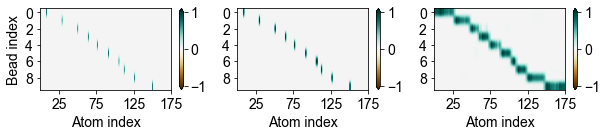

In [22]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(10,1.5))#, sharex=True, sharey=True)

ca_map = np.arange(traj.n_atoms) == traj.top.select(f"name CA")[..., None]
im = axes[0].imshow(ca_map, cmap="BrBG", vmin=-1., vmax=1., aspect='auto')

#ha_map = np.arange(traj.n_atoms) == traj.top.select(f"name HA")[..., None]
axes[1].imshow(ha_map, cmap="BrBG", vmin=-1., vmax=1., aspect='auto')

ca_map = np.arange(traj.n_atoms) == traj.top.select(f"name CA")[..., None]
axes[2].imshow(agg, cmap="BrBG", vmin=-1., vmax=1., aspect='auto')

axes[0].set_ylabel("Bead index")

for i in range(3):
    axes[i].set_xlabel("Atom index")
    axes[i].set_yticks(np.arange(0, 10, 2))
    axes[i].set_xticks(np.arange(25, 200, 50))
    fig.colorbar(im, ax=axes[i], extend="both")
    
fig.savefig("heatmap.png", dpi=300, bbox_inches="tight")

In [10]:
def rgb2hex(r,g,b):
    return "#{:02x}{:02x}{:02x}".format(int(r*255),int(g*255),int(b*255))

def float2col(scale):
    scale = np.abs(scale).clip(0.0, 1.0)
    r = (1-scale) * 256 + scale * 0
    g = (1-scale) * 256 + scale * int(0x71)
    b = (1-scale) * 256 + scale * int(0x7f)
    return rgb2hex(r/256, g/256, b/256)

float2col(1.1)

'#00707e'

In [11]:
import nglview as nv

In [12]:
def set_camera(widget):
    widget._camera_orientation = [
        16.702760255448407,
        3.2556843312107104,
        -20.309920206970997,
        0,
        -4.600914949852625,
        26.091132606703333,
        0.39864815644667556,
        0,
        20.048040325733623,
        3.275340938578024,
        17.01242958142191,
        0,
        1.0052416324615479,
        -0.16883397102355957,
        1.2986979484558105,
        1
    ]

In [13]:
COLORING = np.isin(np.arange(175), [ha_bead, ca_bead])
COLORING = np.isin(np.arange(175), [ca_bead])
COLORING = agg[BEAD]

In [14]:
cm = nv.color.ColormakerRegistry
cm.add_selection_scheme(
    "custom",
    [
        ["#ffcc00", "1-10"],
        ["#00ffcc", "11-20"],
    ]
)

widget = nv.show_mdtraj(traj, gui=True)
widget.clear_representations()

widget.add_ball_and_stick(selection=SELECTION, color="white", quality="high", fogNear=0, fogFar=0)
for i in SELECTION:
    widget.add_ball_and_stick(selection=[i], color=float2col(COLORING[i]), radius=0.2)
    #widget.add_ball(selection=[i], color=float2col(COLORING[i]), radius=0.2)

set_camera(widget)
widget.parameters = {
    # "percentages, "dist" is distance too camera in Angstrom
    "clipNear": 0, "clipFar": 100, "clipDist": 10,
    # percentages, start of fog and where on full effect
    "fogNear": 100, "fogFar": 100,
    # background color
    "backgroundColor": "white",
    "cameraType": "orthographic",
    "cameraFov": 15.
}
widget.display()
#widget.download_image()
widget


## short scroll to get the zoom right

NGLWidget()

In [15]:
widget._camera_orientation

[16.702760255448407,
 3.2556843312107104,
 -20.309920206970997,
 0,
 -4.600914949852625,
 26.091132606703333,
 0.39864815644667556,
 0,
 20.048040325733623,
 3.275340938578024,
 17.01242958142191,
 0,
 1.0052416324615479,
 -0.16883397102355957,
 1.2986979484558105,
 1]

In [16]:
widget.__dict__

{'_trait_values': {'comm': <ipykernel.comm.comm.Comm at 0x11b1b8f40>,
  'keys': ['_camera_orientation',
   '_camera_str',
   '_dom_classes',
   '_gui_theme',
   '_ibtn_fullscreen',
   '_igui',
   '_iplayer',
   '_model_module',
   '_model_module_version',
   '_model_name',
   '_ngl_color_dict',
   '_ngl_coordinate_resource',
   '_ngl_full_stage_parameters',
   '_ngl_msg_archive',
   '_ngl_original_stage_parameters',
   '_ngl_repr_dict',
   '_ngl_serialize',
   '_ngl_version',
   '_ngl_view_id',
   '_player_dict',
   '_scene_position',
   '_scene_rotation',
   '_synced_model_ids',
   '_synced_repr_model_ids',
   '_view_count',
   '_view_height',
   '_view_module',
   '_view_module_version',
   '_view_name',
   '_view_width',
   'background',
   'frame',
   'gui_style',
   'layout',
   'max_frame',
   'n_components',
   'picked'],
  '_camera_orientation': [16.702760255448407,
   3.2556843312107104,
   -20.309920206970997,
   0,
   -4.600914949852625,
   26.091132606703333,
   0.398648156